<a href="https://colab.research.google.com/github/reetvarshney/Data-Analysis-Project/blob/main/project2_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

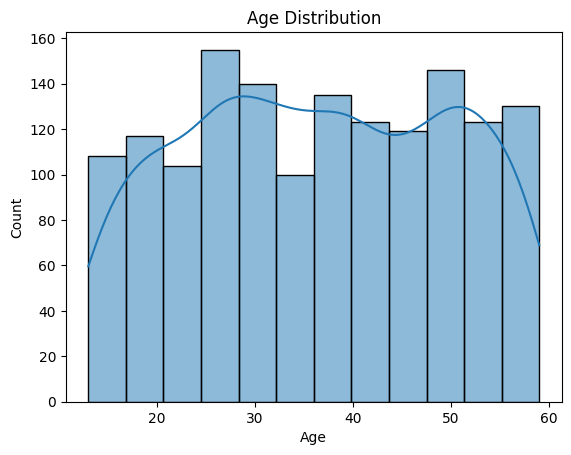

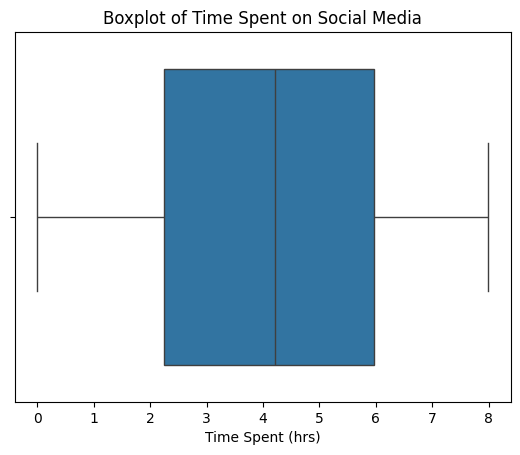

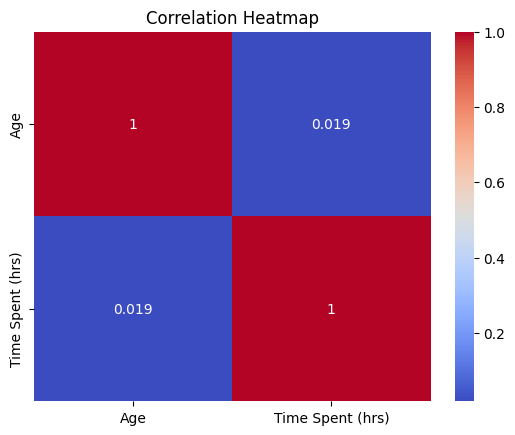

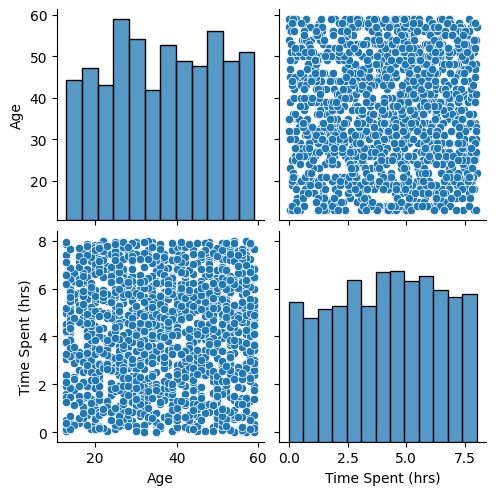

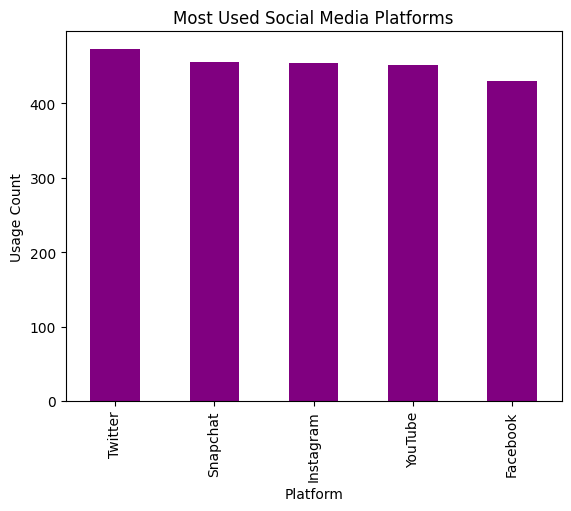

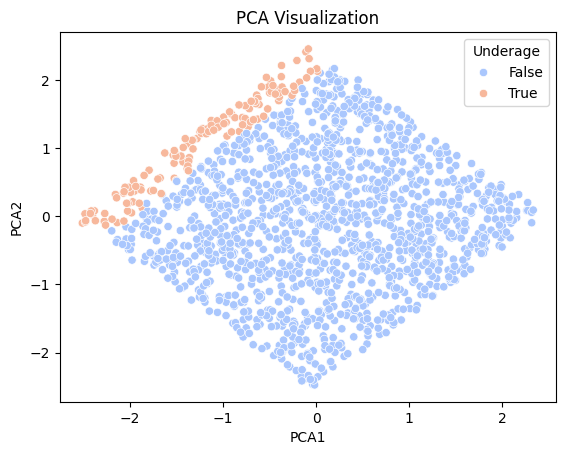

<ipython-input-11-bf350d07d24a>:95: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, palette='coolwarm')


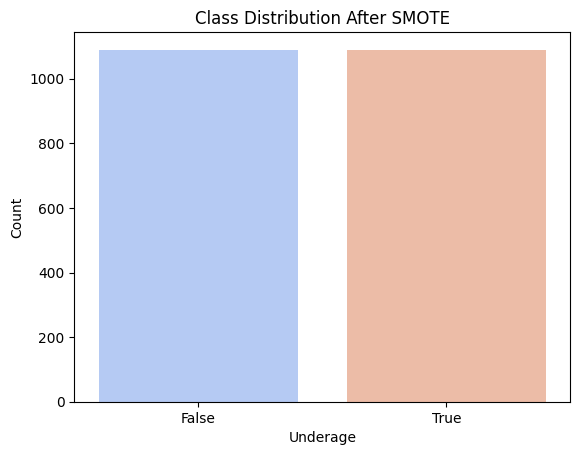

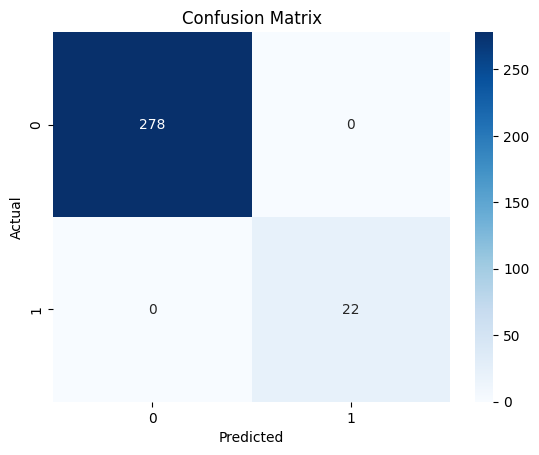

              precision    recall  f1-score   support

       False       1.00      1.00      1.00       278
        True       1.00      1.00      1.00        22

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



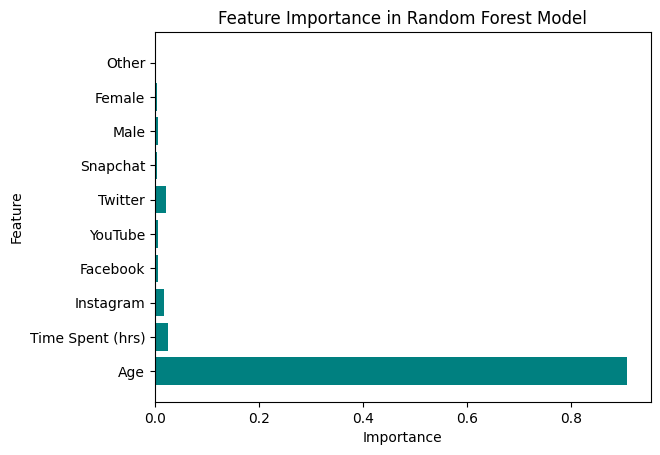

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# Step 1: Prepare the Data
data = {
    'Age': ages,
    'Gender': genders_generated,
    'Platforms Used': ['; '.join(platform) for platform in platforms_used],
    'Time Spent (hrs)': time_spent,
    'Underage': underage
}
df = pd.DataFrame(data)

# Step 2: Handle Missing Values
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Time Spent (hrs)'] = df['Time Spent (hrs)'].fillna(df['Time Spent (hrs)'].mean())
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Platforms Used'] = df['Platforms Used'].fillna('Unknown')

# Step 3: Exploratory Data Analysis
# 1. Histogram for Age
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

# 2. Boxplot for Time Spent
sns.boxplot(x=df['Time Spent (hrs)'])
plt.title('Boxplot of Time Spent on Social Media')
plt.show()

# 3. Correlation Heatmap
corr = df[['Age', 'Time Spent (hrs)']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# 4. Pairplot
sns.pairplot(df[['Age', 'Time Spent (hrs)']])
plt.show()

# 5. Platforms Usage
platform_count = df['Platforms Used'].str.split('; ', expand=True).stack().value_counts()
platform_count.plot(kind='bar', color='purple')
plt.title('Most Used Social Media Platforms')
plt.xlabel('Platform')
plt.ylabel('Usage Count')
plt.show()

# Step 4: Feature Engineering
# Scale Numerical Features
scaler = StandardScaler()
df[['Age', 'Time Spent (hrs)']] = scaler.fit_transform(df[['Age', 'Time Spent (hrs)']])

# One-Hot Encoding for Gender
encoder = OneHotEncoder(sparse_output=False)
gender_encoded = encoder.fit_transform(df[['Gender']])
gender_df = pd.DataFrame(gender_encoded, columns=encoder.categories_[0], index=df.index)
df = pd.concat([df, gender_df], axis=1)

# Binary Features for Platforms
for platform in platforms:
    df[platform] = df['Platforms Used'].apply(lambda x: 1 if platform in x else 0)

df.drop(['Platforms Used', 'Gender'], axis=1, inplace=True)

# Step 5: PCA for Dimensionality Reduction
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df[['Age', 'Time Spent (hrs)', 'Instagram', 'Facebook', 'YouTube', 'Twitter', 'Snapchat']])
df['PCA1'], df['PCA2'] = principal_components[:, 0], principal_components[:, 1]

sns.scatterplot(x='PCA1', y='PCA2', data=df, hue='Underage', palette='coolwarm')
plt.title('PCA Visualization')
plt.show()

# Step 6: Model Preparation
X = df[['Age', 'Time Spent (hrs)', 'Instagram', 'Facebook', 'YouTube', 'Twitter', 'Snapchat', 'Male', 'Female', 'Other']]
y = df['Underage']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SMOTE for Balancing Data

smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)

sns.countplot(x=y_train, palette='coolwarm')
plt.title('Class Distribution After SMOTE')
plt.xlabel('Underage')
plt.ylabel('Count')
plt.show()

# Step 7: Random Forest Classifier
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Step 8: Model Evaluation
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))

# Feature Importance
importances = model.feature_importances_
plt.barh(X.columns, importances, color='teal')
plt.title('Feature Importance in Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()
